## Huy Hoang Vuong

### Part 1: Basic Data Wrangling

In [2]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
public_Health_df= pd.read_csv('data/mosquito_data.csv')

Having read in the data. Take a look at the table

In [4]:
#check
public_Health_df.head(100)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019,37,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-12 00:09:00,2,Res,negative,CULEX RESTUANS,41.657069,-87.546049
96,2019,37,11XX W CHICAGO AVE,11,T049,GRAVID,2019-09-12 00:09:00,7,Res,negative,CULEX RESTUANS,41.896131,-87.656762
97,2019,37,4XX W 127TH,4,T135,GRAVID,2019-09-12 00:09:00,35,Res,negative,CULEX RESTUANS,NaN,NaN
98,2019,37,10XX E 67TH ST,10,T073,GRAVID,2019-09-12 00:09:00,1,Res,negative,CULEX RESTUANS,41.773085,-87.600168


**Question1: What is the shape of the DataFrame**

In [5]:
print(public_Health_df.shape)

(18495, 13)


In [6]:
print(f'Our dataframe has {public_Health_df.shape[0]} rows and {public_Health_df.shape[1]} columns.')

Our dataframe has 18495 rows and 13 columns.


**Question 2: Convert the type of 'Date' column to datetime**

In [7]:
public_Health_df['Date']= public_Health_df['Date'].astype('datetime64')
public_Health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


The tpye of 'Date' table was changed to datetime64

**Question 3: Pick two numeric and two categorical columns: What data they are storing? How are they distributed?**

Two categorical and two numeric columns are: 

    1. Mosquito number: Store the amount of mousquito was catch by each record.
    2. Block: the distance from address to the center of the city 
    3. Species: Store the type of mosquio
    4. Trap type: store the trap type which was used


**Question 4: Are there any columns that contain duplicate information? If so, remove the redundant columns**

Checking the amount of duplicate data in the dataset.

In [8]:
## checking the duplicate data
public_Health_df.duplicated().sum()

658

There are 658 row has exactly same information with other in the dataset.

Lest's delete the duplicate and save the result to a new df

In [9]:
#Delete the duplicate and save the result to a new df
public_Health_df2 = public_Health_df.drop_duplicates()
public_Health_df2.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [10]:
public_Health_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             17837 non-null  int64         
 1   Week             17837 non-null  int64         
 2   Address Block    17837 non-null  object        
 3   Block            17837 non-null  int64         
 4   Trap             17837 non-null  object        
 5   Trap type        17837 non-null  object        
 6   Date             17837 non-null  datetime64[ns]
 7   Mosquito number  17837 non-null  int64         
 8   Mosquito ID      17837 non-null  object        
 9   WNV Present      17837 non-null  object        
 10  Species          17837 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.9+ MB


    Check again to make sure that no two columns also contain the same information

In [11]:
public_Health_df2.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

In [12]:
public_Health_df2.duplicated().sum()

0

Since all of the results are False, we are assured that none of the columns possess identical information, despite having distinct column names.

**Question 5: Are there any null values in the dataframe? If so, deal with them appropriately.**

In [13]:
#find the null value in DataFrame
public_Health_df2.isna().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

In [14]:
#percentage of missing value in each column
public_Health_df2.isna().sum()/public_Health_df2.shape[0]*100

Year                0.00000
Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
dtype: float64

The missing data in column Lat and Lon carry 12.7 percent of value. this is a big amount of data so we will not delete it and deal with it when we will use appropriate methods to handle it

Let's examine the process of imputation in this context

In [15]:
print(public_Health_df2['Lat'].max())
print(public_Health_df2['Lat'].min())
print(public_Health_df2['Lat'].max()-public_Health_df2['Lat'].min())

42.01780085
41.644720066
0.37308078400000255


In [16]:
print(public_Health_df2['Lon'].max())
print(public_Health_df2['Lon'].min())
print(public_Health_df2['Lon'].max()-public_Health_df2['Lon'].min())

-87.53105087783659
-87.854473351
0.32342247316340433


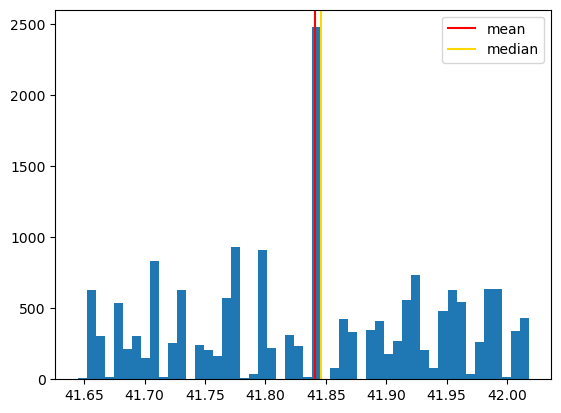

In [77]:
#Lat Column
plt.figure()
plt.hist(public_Health_df2['Lat'], bins=50)
plt.axvline(public_Health_df2['Lat'].mean(), label='mean', color= 'red')
plt.axvline(public_Health_df2['Lat'].median(), label='median', color= 'gold')
plt.legend()
plt.show()

In [19]:
print(public_Health_df2['Lon'].mean())
print(public_Health_df2['Lon'].value_counts())

-87.69164248395428
-87.797517    292
-87.764737    272
-87.736925    269
-87.590180    256
-87.564236    254
             ... 
-87.731545      1
-87.703101      1
-87.695777      1
-87.770828      1
-87.664758      1
Name: Lon, Length: 2500, dtype: int64


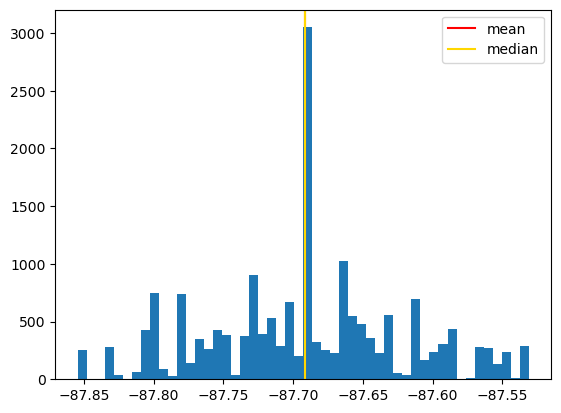

In [76]:
# let supervised the Lon column
plt.figure()
plt.hist(public_Health_df2['Lon'], bins=50)
plt.axvline(public_Health_df2['Lon'].mean(), label='mean', color= 'red')
plt.axvline(public_Health_df2['Lon'].median(), label='median', color= 'gold')
plt.legend()
plt.show()

According to the two fee charts above. the traps are placed discretely and are not actually clustered in any particular coordinate cluster. So in this case we will keep the rows that contain null values in these two columns and will process them during the analysis if we have to.

### Part 2:Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

In [24]:
public_Health_df2['Year'].sort_values().unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019], dtype=int64)

There are total 13 years in the dataset. If we put all in one visual, it will be very hard to be able to see the different between each year. So we will divide it to 3 difference period: 2007- 2010, 2011-2014 and 2015-2019

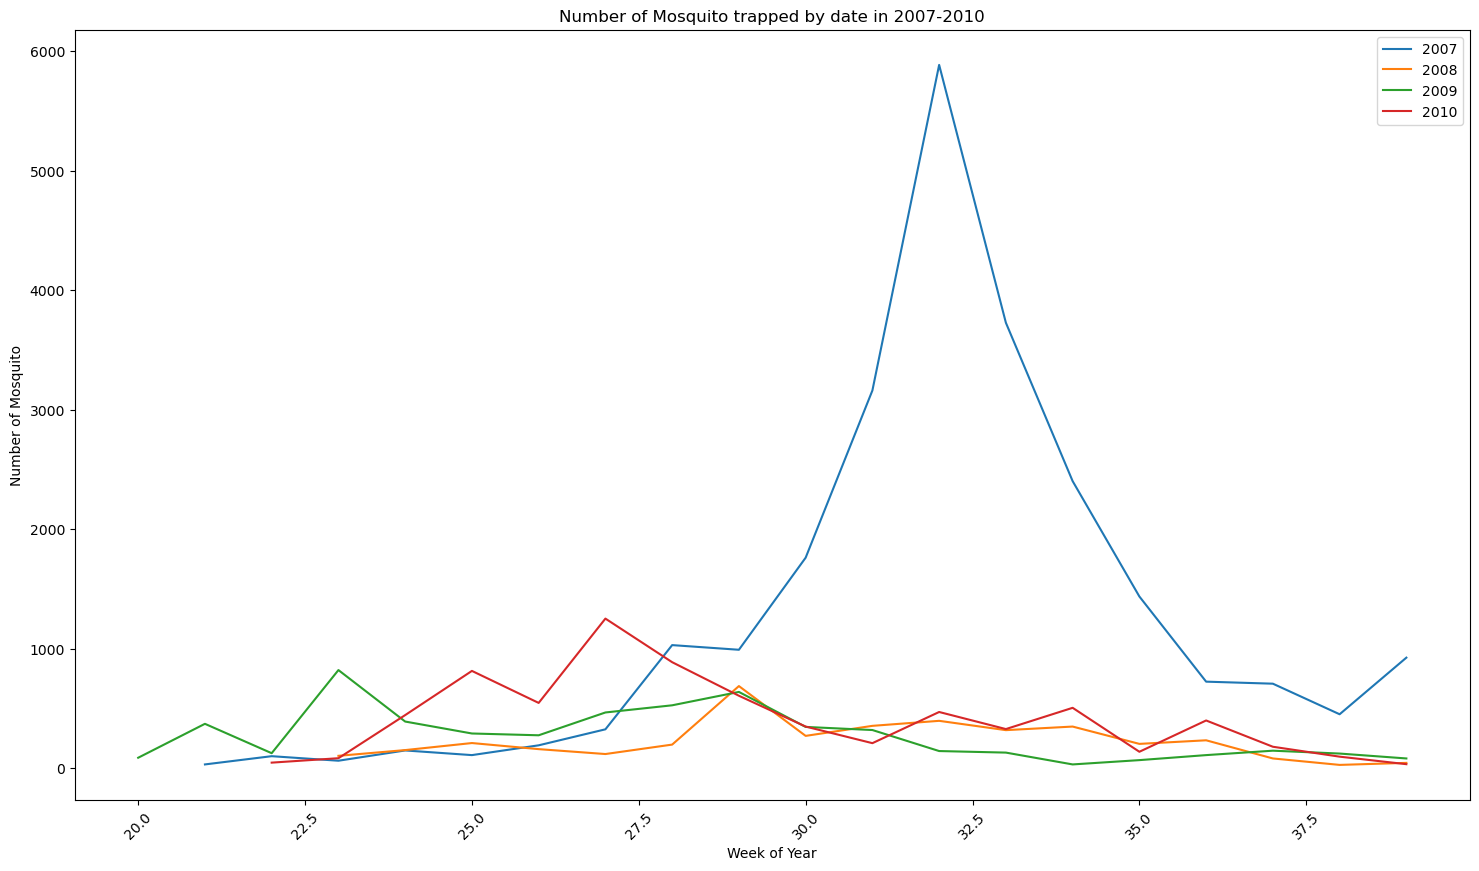

In [25]:

plt.figure(figsize=(18,10))
plt.plot(public_Health_df2[public_Health_df2["Year"]==2007].groupby('Week').sum()['Mosquito number'], label = '2007')
plt.plot(public_Health_df2[public_Health_df2["Year"]==2008].groupby('Week').sum()['Mosquito number'], label = '2008')
plt.plot(public_Health_df2[public_Health_df2["Year"]==2009].groupby('Week').sum()['Mosquito number'], label = '2009')
plt.plot(public_Health_df2[public_Health_df2["Year"]==2010].groupby('Week').sum()['Mosquito number'], label = '2010')


plt.xticks(rotation = 45)
plt.xlabel('Week of Year')
plt.ylabel('Number of Mosquito')
plt.title('Number of Mosquito trapped by date in 2007-2010')

plt.legend()
plt.show()

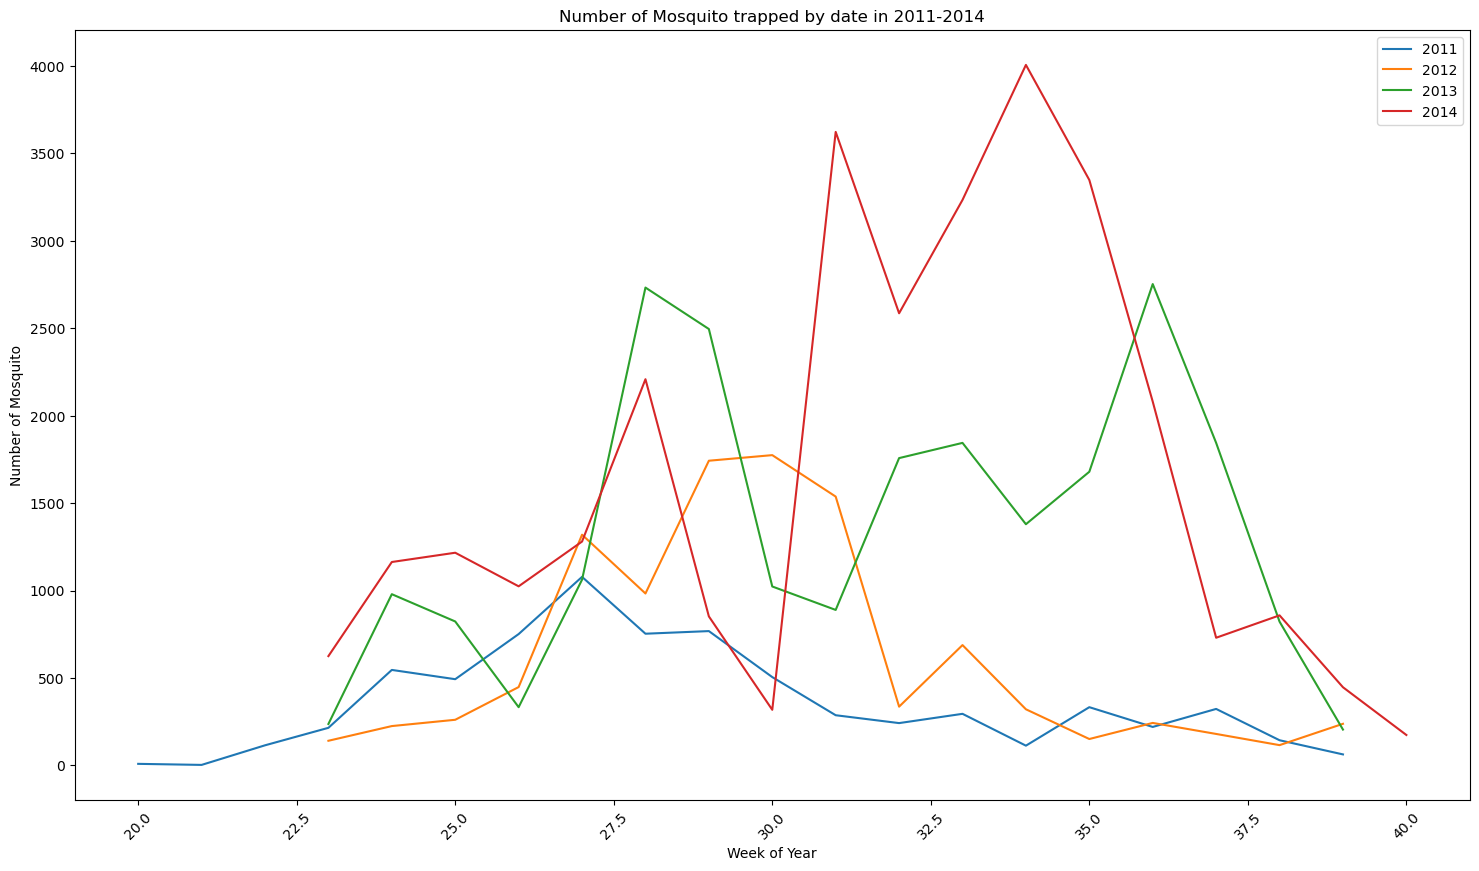

In [26]:
plt.figure(figsize=(18,10))

plt.plot(public_Health_df2[public_Health_df2["Year"]==2011].groupby('Week').sum()['Mosquito number'], label = '2011')
plt.plot(public_Health_df2[public_Health_df2["Year"]==2012].groupby('Week').sum()['Mosquito number'], label = '2012')
plt.plot(public_Health_df2[public_Health_df2["Year"]==2013].groupby('Week').sum()['Mosquito number'], label = '2013')
plt.plot(public_Health_df2[public_Health_df2["Year"]==2014].groupby('Week').sum()['Mosquito number'], label = '2014')

plt.xticks(rotation = 45)
plt.xlabel('Week of Year')
plt.ylabel('Number of Mosquito')
plt.title('Number of Mosquito trapped by date in 2011-2014')

plt.legend()
plt.show()

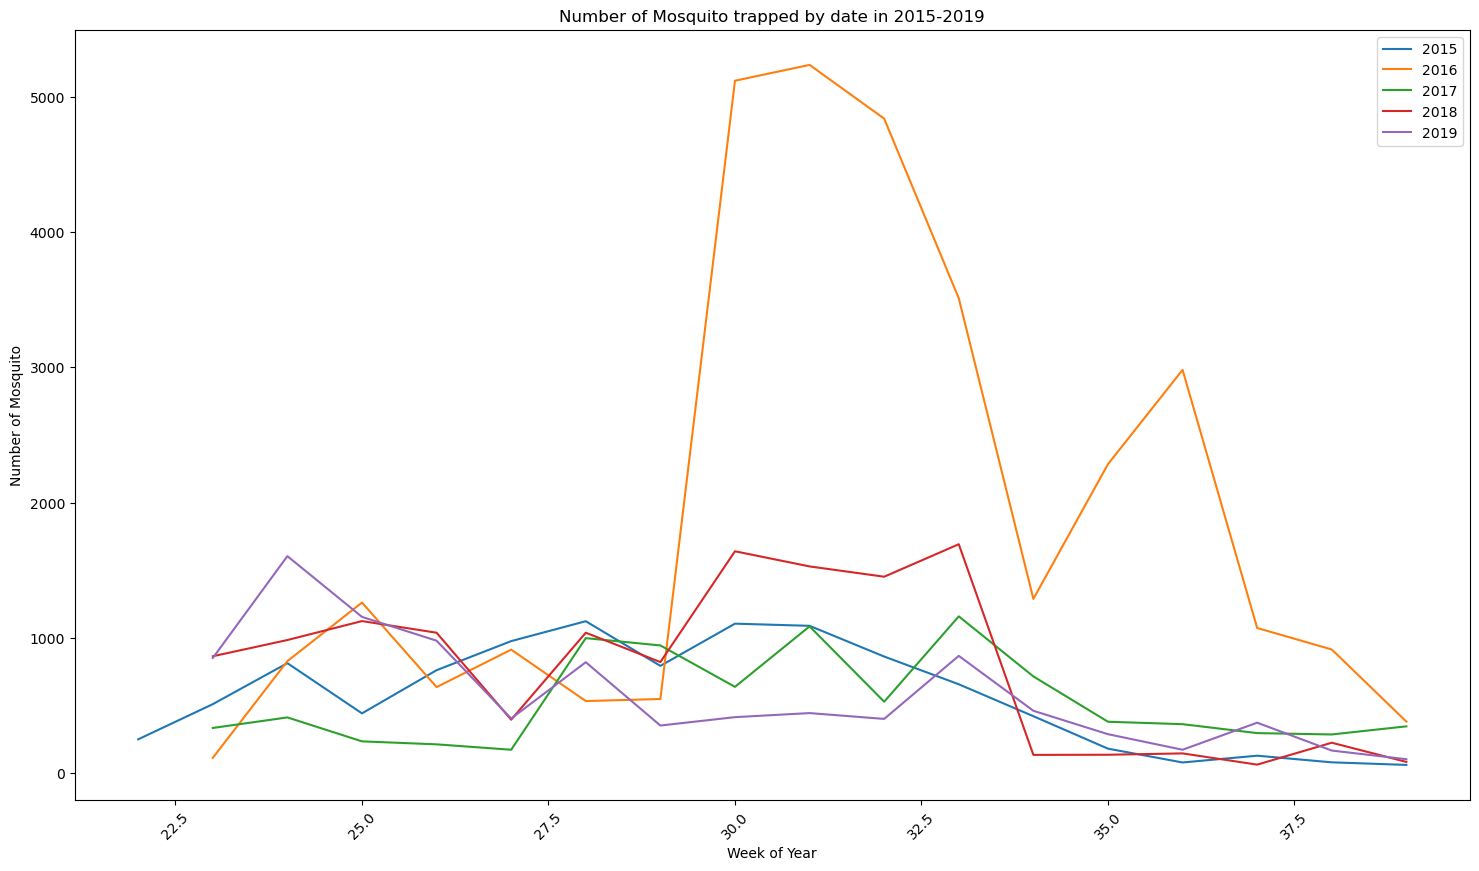

In [27]:
plt.figure(figsize=(18,10))
plt.plot(public_Health_df2[public_Health_df2["Year"]==2015].groupby('Week').sum()['Mosquito number'], label = '2015')
plt.plot(public_Health_df2[public_Health_df2["Year"]==2016].groupby('Week').sum()['Mosquito number'], label = '2016')
plt.plot(public_Health_df2[public_Health_df2["Year"]==2017].groupby('Week').sum()['Mosquito number'], label = '2017')
plt.plot(public_Health_df2[public_Health_df2["Year"]==2018].groupby('Week').sum()['Mosquito number'], label = '2018')
plt.plot(public_Health_df2[public_Health_df2["Year"]==2019].groupby('Week').sum()['Mosquito number'], label = '2019')

plt.xticks(rotation = 45)
plt.xlabel('Week of Year')
plt.ylabel('Number of Mosquito')
plt.title('Number of Mosquito trapped by date in 2015-2019')

plt.legend()
plt.show()

Accoording to thechart above, we can see that the number of mosquito was catch in all the year start from week 20 to week 40 of the year. In most of the year, the trend is quite similar with the range is from 0 to aroung 1500 max. Except in year 2007 reach almost 6000, 2013 is 2500, 2014 4000 and 2016 is over 5000 for the highest number of each year. 

### Part 3: Advance EDA

**Question 1: the relationship between mosquito species and WNV prevalence**

Take a look again the dataframe table

In [78]:
public_Health_df2

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.845715,-87.691698
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18489,2013,35,63XX W 64TH ST,63,T155,GRAVID,2013-08-29 00:08:00,3,Pip,positive,CULEX PIPIENS,41.776009,-87.779408
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176


Check how many types of mosquitoes there are

In [29]:
mos_list=public_Health_df2['Species'].unique()

In [30]:
mos_list

array(['CULEX RESTUANS', 'CULEX TERRITANS', 'CULEX SALINARIUS',
       'CULEX PIPIENS'], dtype=object)

Check how many mosquito was caught in total

In [31]:
total_mos= public_Health_df2['Mosquito number'].sum()
total_mos

186554

Check how many mosquito was caught by Species and how many in them is positive with WNV

In [32]:
mos_by_species= public_Health_df2.groupby(['Species']).sum()['Mosquito number']
mos_by_species

Species
CULEX PIPIENS        57657
CULEX RESTUANS      126641
CULEX SALINARIUS       446
CULEX TERRITANS       1810
Name: Mosquito number, dtype: int64

In [33]:
mos_positive= public_Health_df2[public_Health_df2['WNV Present']=='positive'].groupby(['Species']).sum()['Mosquito number']
mos_positive


Species
CULEX PIPIENS       27501
CULEX RESTUANS      43079
CULEX SALINARIUS       13
CULEX TERRITANS        34
Name: Mosquito number, dtype: int64

In [34]:
mos_negative= public_Health_df2[public_Health_df2['WNV Present']=='negative'].groupby(['Species']).sum()['Mosquito number']
mos_negative

Species
CULEX PIPIENS       30156
CULEX RESTUANS      83562
CULEX SALINARIUS      433
CULEX TERRITANS      1776
Name: Mosquito number, dtype: int64

In [40]:
df =pd.DataFrame({
    'Positive': mos_positive/mos_by_species*100,
    'Negative': mos_negative/mos_by_species*100,
}, index=mos_list)
df

,Positive,Negative
CULEX RESTUANS,34.016630,65.983370
CULEX TERRITANS,1.878453,98.121547
CULEX SALINARIUS,2.914798,97.085202
CULEX PIPIENS,47.697591,52.302409


<Figure size 640x480 with 0 Axes>

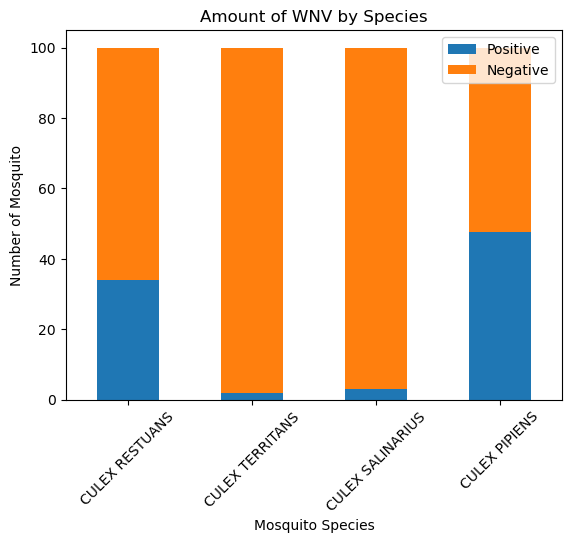

In [41]:
plt.figure()
df.plot.bar(stacked=True)
plt.xticks(rotation = 45)
plt.title('Amount of WNV by Species')
plt.ylabel('Number of Mosquito')
plt.xlabel('Mosquito Species')
plt.show()

As we can see in the bar chart above, most of the mosquito was caught has WNV prevalence qite low excep Culex Pipiens. The portion of the positive and negative in this type of Mosquito is almost equal with 47.7% positive and 52.3% negative.

**Question 2:The relationship between the number of mosquitos caught and trap type.**

Check the dataset again

In [42]:
public_Health_df2.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.845715,-87.691698
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


What type trap do we have?

In [43]:
trap_type= public_Health_df2['Trap type'].unique()
trap_type

array(['GRAVID', 'SENTINEL', 'CDC', 'OVI'], dtype=object)

In [44]:
mos_caught= public_Health_df2.groupby('Trap type').sum()['Mosquito number']
mos_caught

Trap type
CDC           9514
GRAVID      171905
OVI              1
SENTINEL      5134
Name: Mosquito number, dtype: int64

So we have the the number of mosquito was caught by each type of trap is: 

    CDC      :       9514
    GRAVID   :     171905
    OVI      :          1
    SENTINEL :       5134
Let's make the visual for it 

In [45]:
mos_caught_df= pd.DataFrame({
    'Mosquito number': mos_caught},
    index=trap_type)
mos_caught_df

,Mosquito number
GRAVID,171905
SENTINEL,5134
CDC,9514
OVI,1


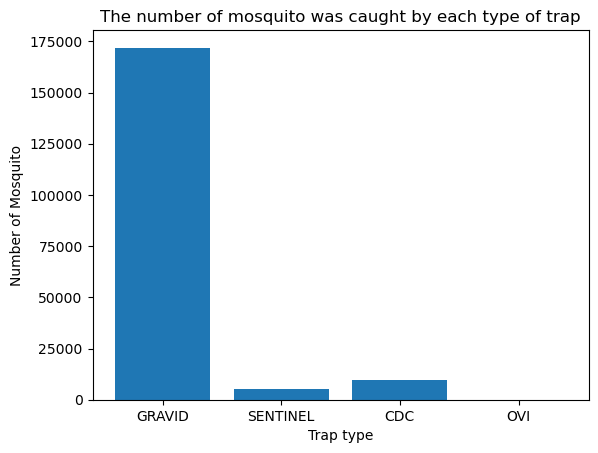

In [46]:
plt.figure()
plt.bar(mos_caught_df.index, mos_caught_df['Mosquito number'])
plt.xlabel("Trap type")
plt.ylabel('Number of Mosquito')
plt.title('The number of mosquito was caught by each type of trap')
plt.show()

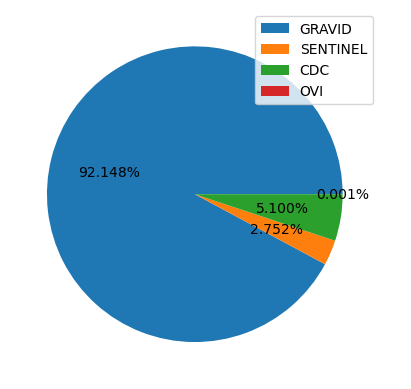

In [51]:
plt.pie(mos_caught_df['Mosquito number'], explode=(0, 0, 0, 0.4), labels= mos_caught_df.index, labeldistance = None, autopct='%1.3f%%')
plt.legend()

From the chart, we can see that most of the trap is GRAVID type with 92.148 percent in total traps were use in the record. The OVI trap was used only 1 time(o.001%) and cannot appear in the visuals. Two other kinds of traps are SENTINEL and CDC took 5.1% and 2.752 % for each in total.

**Question 4:The relationship between Address Block and number of mosquito**

List of the address have trap

In [48]:
add_list= public_Health_df2['Address Block'].unique()
add_list

array(['100XX W OHARE AIRPORT', '52XX S KOLMAR AVE', '58XX N WESTERN AVE',
       '39XX N SPRINGFIELD AVE', '131XX S BRANDON AVE',
       '21XX N CANNON DR', '11XX W ROOSEVELT RD', '22XX W 51ST ST',
       '22XX N CANNON DR', '3XX W 104TH ST', '25XX W GRAND AVE',
       '82XX S KOSTNER AVE', '1XX N CENTRAL PARK DR',
       '77XX S EBERHART AVE', '4XX E 130TH ST', '39XX S ASHLAND AVE',
       '55XX S NARRAGANSETT AVE', '25XX S MILLARD AVE',
       '91XX W HIGGINS RD', '89XX S MUSKEGON AVE', '61XX W FULLERTON AVE',
       '20XX N DOMINICK ST', '17XX W 95TH ST', '71XX N HARLEM AVE',
       '70XX W ARMITAGE AVE', '62XX N MCCLELLAN AVE',
       '64XX S STONY ISLAND AVE', '9XX W GARFIELD BLVD',
       '41XX N OAK PARK AVE', '101XX S STONY ISLAND AVE',
       '36XX N PITTSBURGH AVE', '89XX S CARPENTER ST', '10XX E 67TH ST',
       '35XX W 51ST ST', '13XX N LARAMIE AVE', '14XX N HUMBOLDT DR',
       '45XX N CAMPBELL AVE', '71XX S SOUTH SHORE DR',
       '119XX S ASHLAND AVE', '17XX W ADDISON S

There are 154 Location were setup trap

Mostquito caught each address

In [53]:
mos_caught2= public_Health_df2.groupby('Address Block').sum()['Mosquito number'].sort_values()
mos_caught2

Address Block
21XX S HAMLIN AVE               1
54XX W PARKER AVE               2
104XX S OGLESBY AVE             2
65XX S RACINE AVE               2
29XX N KENNETH AVE              3
                            ...  
52XX S KOLMAR AVE            4974
70XX N MOSELLE AVE           6618
101XX S STONY ISLAND AVE     8117
41XX N OAK PARK AVE          9304
100XX W OHARE AIRPORT       20812
Name: Mosquito number, Length: 154, dtype: int64

we create the DataFrame for the mosquito caught in each address

In [54]:
mos_caught_df2= pd.DataFrame({
    'Mosquito number': mos_caught2},
    index=add_list)
mos_caught_df2

,Mosquito number
100XX W OHARE AIRPORT,20812
52XX S KOLMAR AVE,4974
58XX N WESTERN AVE,4085
39XX N SPRINGFIELD AVE,2040
131XX S BRANDON AVE,1620
...,...
65XX S RACINE AVE,2
80XX S KEDZIE AVE,5
21XX N STAVE ST,15
40XX N AUSTIN AVE,37


How many place have less than 100 caught?

In [91]:
mos_caught_df2[mos_caught_df2['Mosquito number']< 100].count()

Mosquito number    58
dtype: int64

How many place caught in range 100 to 1000

In [102]:
mos_caught_df2[(mos_caught_df2['Mosquito number']> 100) & (mos_caught_df2['Mosquito number']<1000)].count()

Mosquito number    42
dtype: int64

So we create the chart using the number we have above about the number of Mosquito in each place was caght

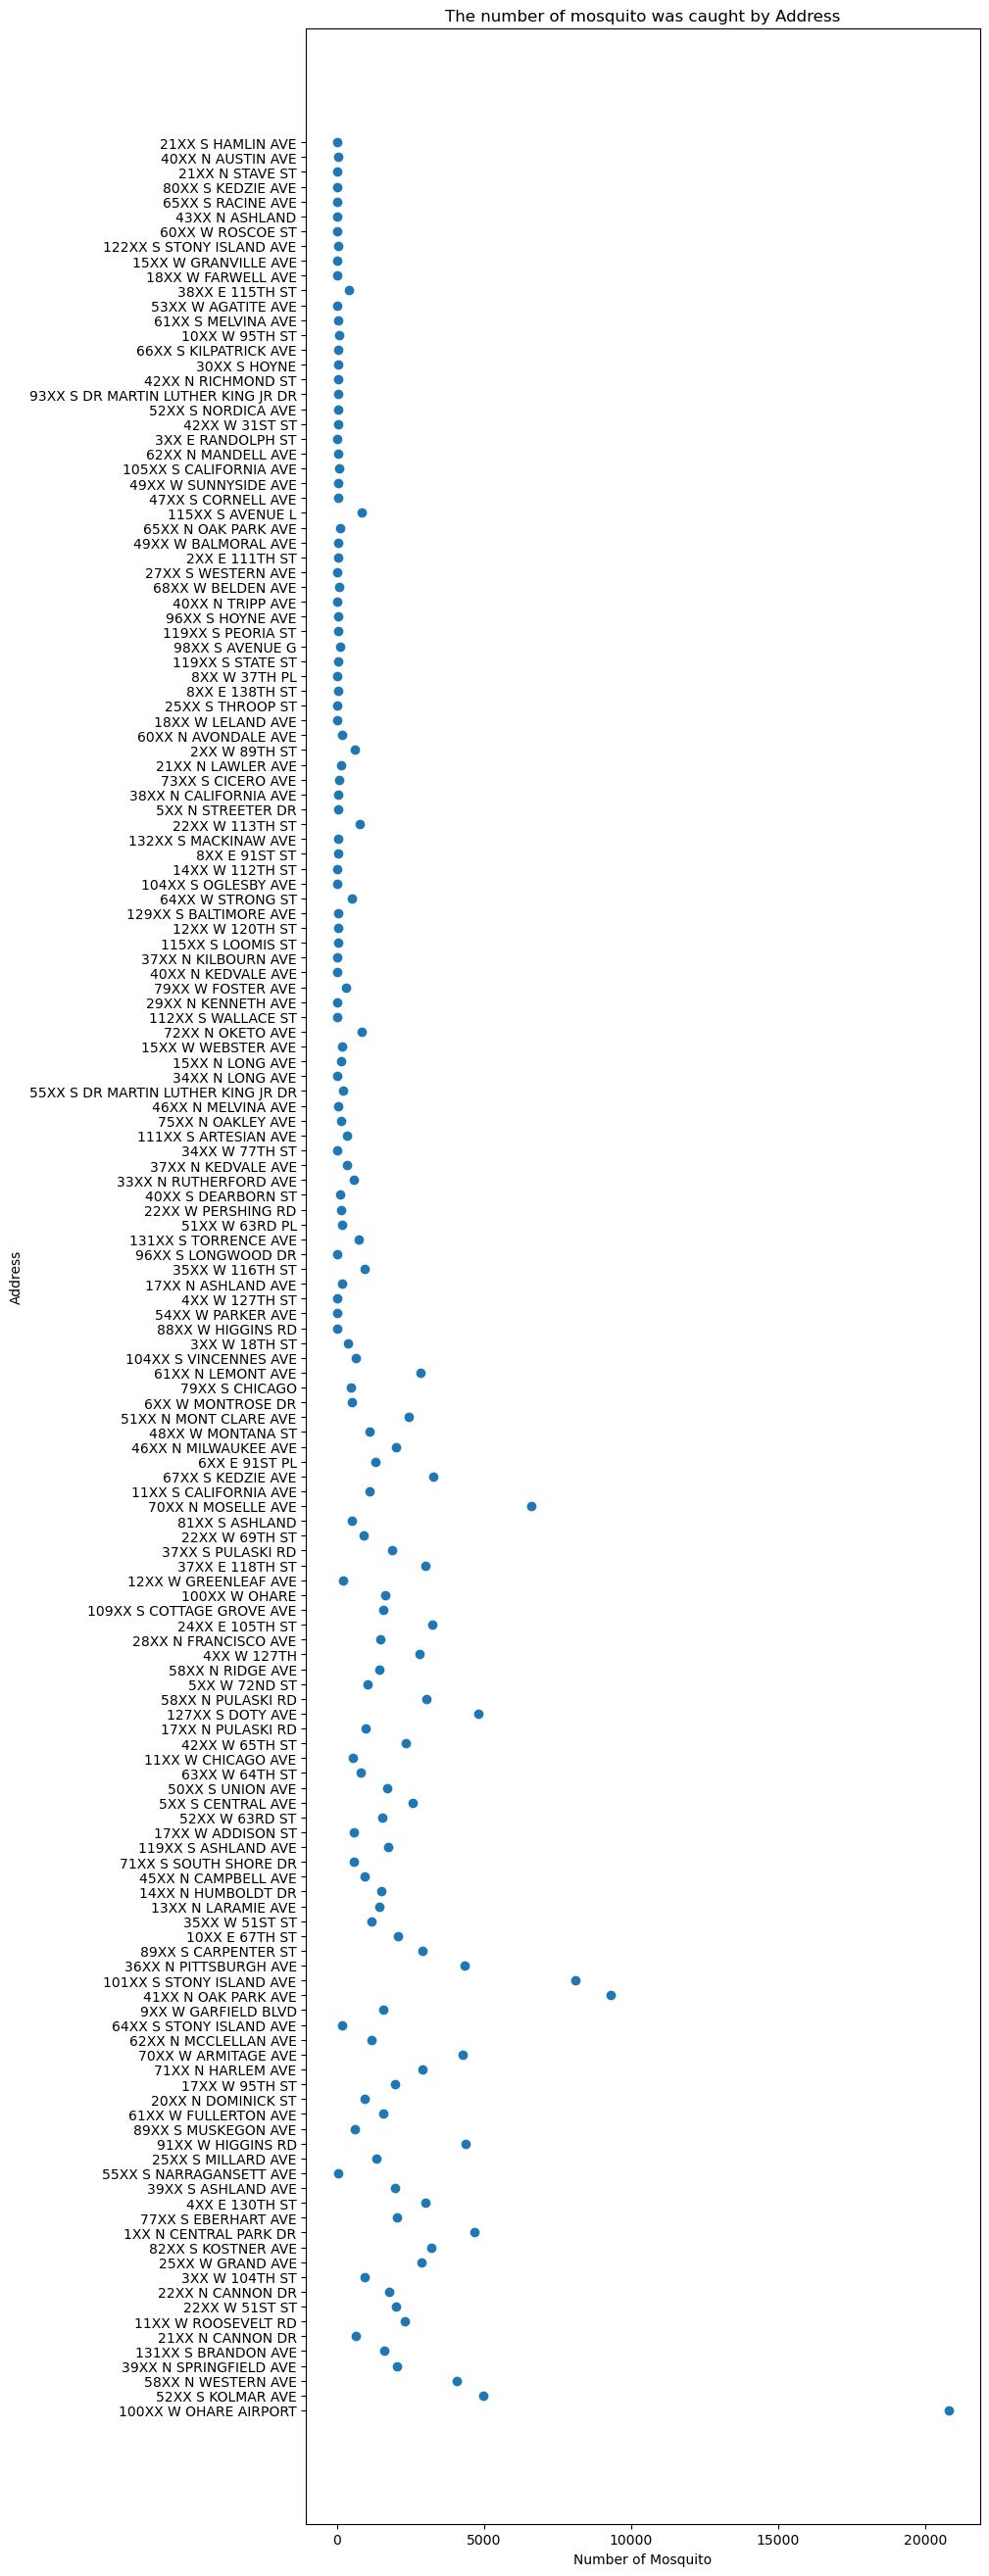

In [88]:
plt.figure(figsize=(10, 26))
plt.scatter(mos_caught_df2['Mosquito number'],mos_caught_df2.index )
plt.tight_layout()
plt.ylabel("Address")
plt.xlabel('Number of Mosquito')
plt.title('The number of mosquito was caught by Address')
plt.show()

As we can see from the data result, the range of number of mosquito by address is very difference from 1 to 20812. We can see in the graph most of the address caught less than 5000 in the whole period of time. More specific, there are 58 places had caught less than 100 in whole 13 years, and 42 places had the record is less in range from 100 to 1000. Base on those number, it's must be some reason to make some place become significant higher than other such as the population in that address is more than other, or the maintain hygiene condition in those address is not good as others.